**Úkol 3**

In [1]:
import pandas
import seaborn
import matplotlib as plt
import numpy
from scipy import stats


* Data z 2015

In [27]:
data = pandas.read_csv("Life-Expectancy-Data-Updated.csv")
data = data[data["Year"]==2015]
data = data.reset_index()
data.head()

,index,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
3,27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
4,43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


***Model A - závislost pouze na GDP - graf***

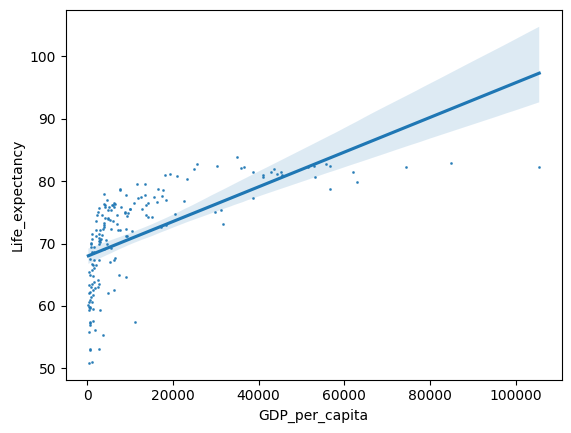

In [21]:
data["Expectancy_zscore"] = numpy.abs(stats.zscore(data["Life_expectancy"]))
data = data[data["Expectancy_zscore"]<3]
g = seaborn.regplot(data, x = "GDP_per_capita", y = "Life_expectancy", scatter_kws={"s":1})


* Výsledek pomocí tabulky

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = "Life_expectancy ~ GDP_per_capita"
mod= smf.ols(formula, data)
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.90e-21
Time:                        11:02:43   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Koeficient determinace je 0.396

***Model B - s více nezávislými proměnými***

* Schooling - tipuju (+), prodloužení délky života
* Incidents_HIV - tipuju (-), snížení délky života
* Diphtheria - tipuju (+), prodloužení délky života
* Polio - tipuju (+), prodloužení délky života
* BMI - tipuju (-), snížení délky života
* Measels - tipuju (+), prodloužení délky života

Normalita residuí:

* H0: Data mají normální rozdělení
* H1: Data nemají normální rozdělení

In [25]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod= smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.22e-54
Time:                        13:10:40   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P hodnoty testů Omnibus a JB jsou > než 5% -> nezamítáme H0, předpokládáme, že data mají normální rozdělení.

Koeficient determinace je 0.79 oproti původním 0.396 -> došlo k zpřesnění modelu (koeficient se víc blíží 1).

* Diphtheria má lehce záporný koef - spíš to nebude mít vliv na dožití, z modelu bych vyřadila
* BMI - předpokládala jsem, že bude snižovat délku života kvůli obezitě, ale naopak asi rozvojové státy mají obecně nižší BMI a i nižší délku života, takže tam je (+)

Nejvyší P>|t| má Diphtheria -> odebereme z modelu

In [ ]:
Nejvyší P>|t| má Diphtheria -> odebereme z modelu

In [28]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles"
mod= smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.12e-55
Time:                        13:29:07   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Po odebrání se koeficient determinace nezměnil. Hodnoty koeficientů se téměř nezměnili. 